In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [2]:
df=pd.read_csv("data.csv")
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  
0      2.99     4.80        0  
1      5.05    12.00        0  
2      1.04     1.89        0  
3      1.75     7.56        0  
4      0.76     5.96        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1500 non-null   int64  
 1   ncust     1500 non-null   int64  
 2   customer  1500 non-null   int64  
 3   age       1500 non-null   int64  
 4   ed        1500 non-null   int64  
 5   employ    1500 non-null   int64  
 6   address   1500 non-null   int64  
 7   income    1500 non-null   int64  
 8   debtinc   1500 non-null   float64
 9   creddebt  1500 non-null   float64
 10  othdebt   1500 non-null   float64
 11  default   1500 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 140.8 KB


In [4]:
df["total_debt"]=df["creddebt"]+df["othdebt"]

In [5]:
df.shape

(1500, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   branch      1500 non-null   int64  
 1   ncust       1500 non-null   int64  
 2   customer    1500 non-null   int64  
 3   age         1500 non-null   int64  
 4   ed          1500 non-null   int64  
 5   employ      1500 non-null   int64  
 6   address     1500 non-null   int64  
 7   income      1500 non-null   int64  
 8   debtinc     1500 non-null   float64
 9   creddebt    1500 non-null   float64
 10  othdebt     1500 non-null   float64
 11  default     1500 non-null   int64  
 12  total_debt  1500 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 152.5 KB


In [7]:
df.corr()["default"]

branch        0.031757
ncust         0.013943
customer      0.031392
age          -0.287834
ed            0.080681
employ       -0.293524
address      -0.269841
income       -0.092872
debtinc       0.366074
creddebt      0.187248
othdebt       0.090167
default       1.000000
total_debt    0.135218
Name: default, dtype: float64

In [8]:
import seaborn as sns

<AxesSubplot:>

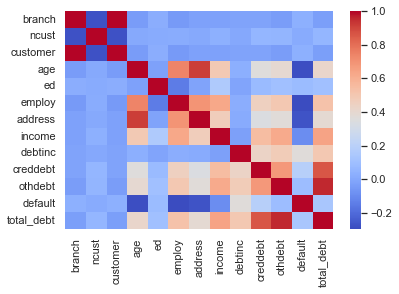

In [9]:
sns.heatmap(df.corr(),  cmap="coolwarm")

In [60]:
import matplotlib.pyplot as plt

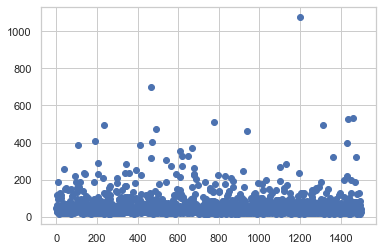

In [61]:
plt.plot(df["income"],"bo")

In [62]:
df1=df[df["income"]<800]

In [63]:
df1=df.loc[:,["age","employ","address","income","total_debt","default"]]


In [64]:
X = df.loc[:, df.columns != 'default']
y = df.loc[:, df.columns == 'default']

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
model = LogisticRegression()
model.fit(X_train, y_train)


/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
0.8*1500

1200.0

In [67]:
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.8


In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusionmatrix=confusion_matrix(y_test,y_pred)

In [70]:
confusionmatrix

array([[171,  22],
       [ 38,  69]])

In [71]:
from sklearn.metrics import f1_score

In [73]:
f1_score(y_test,y_pred)

0.696969696969697

In [74]:
from sklearn.metrics import precision_score

In [75]:
precision_score(y_test,y_pred)

0.7582417582417582

In [76]:
from sklearn.metrics import recall_score

In [77]:
recall_score(y_test,y_pred)

0.6448598130841121

In [ ]:
[163,  30],
       [ 44,  63]
0.7533333333333333